In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Import dataset
AccidentData_DecTree = pd.read_csv('E:\Training Development\Coursera\IBM Data Science\Course 9 - Capstone Project\Capstone Project Data\AccidentData_4_DecTree.csv')
AccidentData_DecTree.head()

,OBJECTID,SEVERITYCODE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,Dayofweek,MonthofYear
0,1,2,2,1,9,6,2,3
1,2,1,3,2,9,3,2,12
2,3,1,3,1,1,6,3,11
3,4,1,3,3,1,6,4,3
4,5,2,2,2,9,6,2,1


In [3]:
len(AccidentData_DecTree.index)

189337

In [4]:
# Define feature set, X
AccidentData_DecTree.columns

Index(['OBJECTID', 'SEVERITYCODE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'Dayofweek', 'MonthofYear'],
      dtype='object')

In [5]:
# Convert datastructure to a numpy array
X = AccidentData_DecTree[['JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'Dayofweek', 'MonthofYear']].values
X[0:5]

array([[ 2,  1,  9,  6,  2,  3],
       [ 3,  2,  9,  3,  2, 12],
       [ 3,  1,  1,  6,  3, 11],
       [ 3,  3,  1,  6,  4,  3],
       [ 2,  2,  9,  6,  2,  1]], dtype=int64)

In [6]:
# Define the labels
y = AccidentData_DecTree["SEVERITYCODE"]
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [7]:
# Set up the Decistion Tree
# Train / Test split

from sklearn.model_selection import train_test_split

In [8]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (151469, 6) (151469,)
Test set: (37868, 6) (37868,)


In [9]:
# Modelling
# First create an instance of the DecisionTreeClassifier called SevCodeTree

SevCodeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SevCodeTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
# Fit the data with the training feature matrix X_trainset and training response vector y_trainset

SevCodeTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
# Make some predictions on the testing dataset and store it into a variable called predTree
predTree = SevCodeTree.predict(X_testset)

In [12]:
print (predTree [0:5])
print (y_testset [0:5])


[1 1 1 1 1]
28112    1
88400    1
56910    1
61465    1
1054     1
Name: SEVERITYCODE, dtype: int64


In [ ]:
# EVALUATION

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6952043942114714


In [ ]:
# But, data is not balanced, therefore use the following:
# - F1 score
# - Jaccard index
# - Precision / Recall score

In [14]:
# F1-score
from sklearn.metrics import f1_score
f1_score(y_testset, predTree, average='weighted') 

0.5702075235072187

In [15]:
import numpy as np
from sklearn.metrics import jaccard_score

jaccard_score(y_testset, predTree)

0.6952043942114714

In [16]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_testset, predTree)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


In [17]:
from sklearn.datasets import load_iris
from sklearn import tree

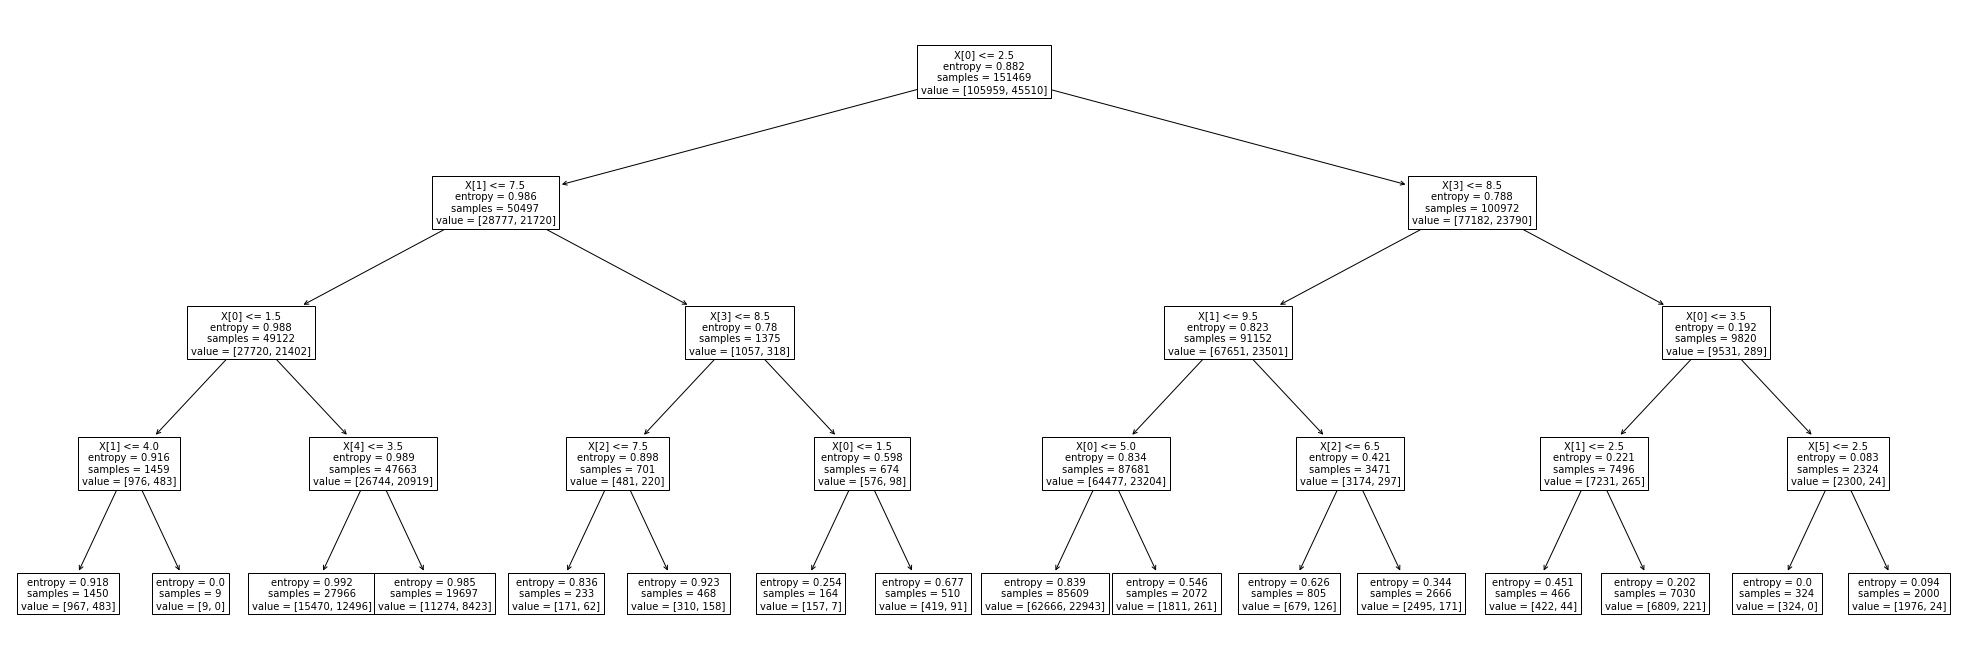

In [18]:
fig, ax = plt.subplots(figsize=(35, 12))
tree.plot_tree(SevCodeTree, fontsize = 10)
plt.show()
